# Classification - imbalanced classes

## Introduction

In classification you are trying to split data into a number of discrete classes. This works very well if there are equal number of training examples for the different classes but can fall down if one class dominates. In the extreme case when your classifier might always predict the most frequently occuring class. If pure prediction is the goal this can be the correct thing to do, but it could be the case that the infrequent occuring class is more important to you (for example, customers who spend the most might be rarer for a company but more important for the company's business model).

As Provost (_Machine Learning from Imbalanced Data Sets 101_)<sup>[1]</sup> describes it,
>The assumptions built into (most of) these algorithms are: 
> 1. that maximizing accuracy is the goal, and 
> 2. that,  in  use, the  classifier  will  operate  on  data  drawn  from the same distribution as the training data.

This second point is important when, for example, the data you use for training is imblanaced but you expect the live system to be running on more balanced data.

[1]:http://pages.stern.nyu.edu/~fprovost/Papers/skew.PDF

## Terminology

On terminology, when you are classifying between two class this is called binomial classification (typically the class are labelled 1 and 0), and if there are more than two classes it is sometimes called multinomial classification and sometimes multiclass classification.

For binomial classification, when the class is imbalanced the class appearing less frequently is known as the minority class (typically labelled 1) and the more frequently appearing class is known as the majority class (typically labelled 0). 

## Basic example

In [1]:
import matplotlib.pyplot as plt

from imblearn.datasets import make_imbalance

from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

First, let's create and visualise some imbalanced data. This way of building an imbalanced class is based on an example given in the _imbalanced-learn_ packages documentation (http://contrib.scikit-learn.org/imbalanced-learn/). Here the data has two classes, with the minority class appearing 5% of the time.

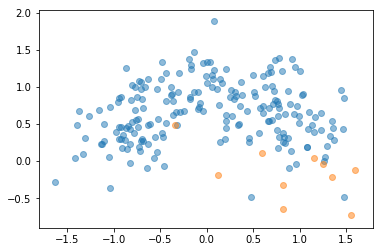

In [2]:
# Based on the imbalance_learn package examples
X, y = make_moons(n_samples=400, shuffle=True, noise=0.3, random_state=40)
X_, y_ = make_imbalance(X, y, ratio=0.05, min_c_=1, random_state=40)


plt.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], alpha=0.5)
plt.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], alpha=0.5)
plt.show()

Then a simple SVM classifier can be fit to it.

In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, stratify=y_, random_state=40 )

# Fit svm model
model = SVC()
model.fit(X_train, y_train)

print classification_report(y_test, model.predict(X_test))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97        67
          1       0.00      0.00      0.00         3

avg / total       0.92      0.94      0.93        70



This classification report shows that whilst the model is good at accurately predicting the majority class it not good at predicting the minority class. This also shows that if all classes are important to you, looking at metrics such as the f1-score is more important than a pure accuracy score.

## Taxonomies

Approaches to tackling imbalances can be catagorised in many different ways. Typically they are catagorised in terms of what you do practically, and for example in the introduction of the paper by Cruz _et al._ (_Tackling Class Imbalance with Ranking_)<sup>[2]</sup> they define the following four catagories:

>**1. Pre-processing** step  changing  the  class  priors  by  under-sampling the majority class and/or creating new synthetic examples of the minority class, or even changing class priors by changing class labels themselves (e.g. MetaCost);

>**2. Training with costs** instead of maximizing accuracy, the training algorithm maximizes weighted accuracy, so that the cost of misclassifying a class is inversely proportional to its frequency;

>**3. Post-processing** by  tweaking  the  decision  boundary  by such  measures  as  changing  a  threshold  after  which  one
class is selected, sometimes with the aid of a ROC curve;

>**4. Ensembles** by which each model within the ensemble is trained  with  balanced  subsets  of  the  data,  coupled with the previous preprocessing techniques.

The paper itself is focused on re-casting the problem as a ranking problem, and also mentions in passing that in some circumstances you can re-cast the problem to be that of anomaly detection.

Ling _et al._ (_Cost Sensitive Learning and the Class Imbalance Problem_)<sup>[3]</sup> provide a different breakdown based more on a theoretical look at class imbalance which shows that there are sounds reasons to tweak probabily thresholds and other techniques (such as MetaCost) are also based around probability thresholds. 

[2]:http://vcmi.inescporto.pt/reproducible_research/ijcnn2016/ClassImbalance/imbalance.pdf
[3]:http://www.csd.uwo.ca/faculty/ling/papers/cost_sensitive.pdf

## Cost of classification

At the heart of a lot of approaches to dealing with imbalanced classes is the idea of the cost of (mis)classification (Ling _et al._ <sup>[3]</sup> provide a good discussion). The idea is that classifing a sample (a particular data point) as being in class 0 when it really is class 1 might have a different impact (have a different _cost_) than classifing sample $x_1$ as class 1 when it really is class 0. The cost of classifying a sample as class $i$ when it actually belongs to class $j$ is written as:
$$c_{ij}$$
Interestingly, for the multinomial case, this cost can vary depending on what incorrect class is suggested (not all misclassifications are equal). Also, you still specify "costs" for correct classifications ($c_{ii}$) though these can be thought of as benefits.

Following the notation used by Ling _et al._, the expected cost ($R$) of classifying sample $x$ as class $i$ can be written as:

$$ R\left( i \mid x\right) = \sum_{j} P\left( j \mid x\right) c_{ij} $$
where $P\left( j \mid x\right)$ is the probability that $x$ belongs to class $j$. (Note, the cost/benefit of correct classification, $c_{ii}$, will often be zero.) The principle behing a lot of techniques is to minimise this expected cost.


[3]:http://www.csd.uwo.ca/faculty/ling/papers/cost_sensitive.pdf